<center> <h1> Suicide Rates Overview 1985 to 2016 <h1/><center/>

### This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### Link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## Index
1. Item 1
2. Item 2
3. Item 3
 * Item 3a

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Used for the map
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import itertools

## Reading the .csv file and taking a general view

In [2]:
data = pd.read_csv('Files/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# rename the columns to ease their use
data.rename(columns={'suicides_no':'No_suicides','HDI for year': 'HDI_for_year', 'country-year':'country_year', 
                   'suicides/100k pop': 'suicides/100k_pop', ' gdp_for_year ($) ':'gdp_for_year', 
                   'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True);
# gdp is similar to PIB in Mexico

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
No_suicides          27820 non-null int64
population           27820 non-null int64
suicides/100k_pop    27820 non-null float64
country_year         27820 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# The command automatically drops HDI_for_year because is the only column that has NaN values
data.dropna(1, inplace=True);

In [6]:
data.describe()

,year,No_suicides,population,suicides/100k_pop,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [7]:
print(f"The Database has {len(data.country.unique())} countries")

The Database has 101 countries


In [8]:
data.tail()

,country,year,sex,age,No_suicides,population,suicides/100k_pop,country_year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,"63,067,077,179",2309,Boomers


## Male suicides vs Female suicides

In [9]:
# Making a big sume depending on the year and gender
pivot_data = data.pivot_table('No_suicides', index='year', columns='sex', aggfunc='sum')
pivot_data.head()

sex,female,male
year,,
1985,32479,83584
1986,33852,86818
1987,35006,91836
1988,33015,88011
1989,41361,118883


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecatio

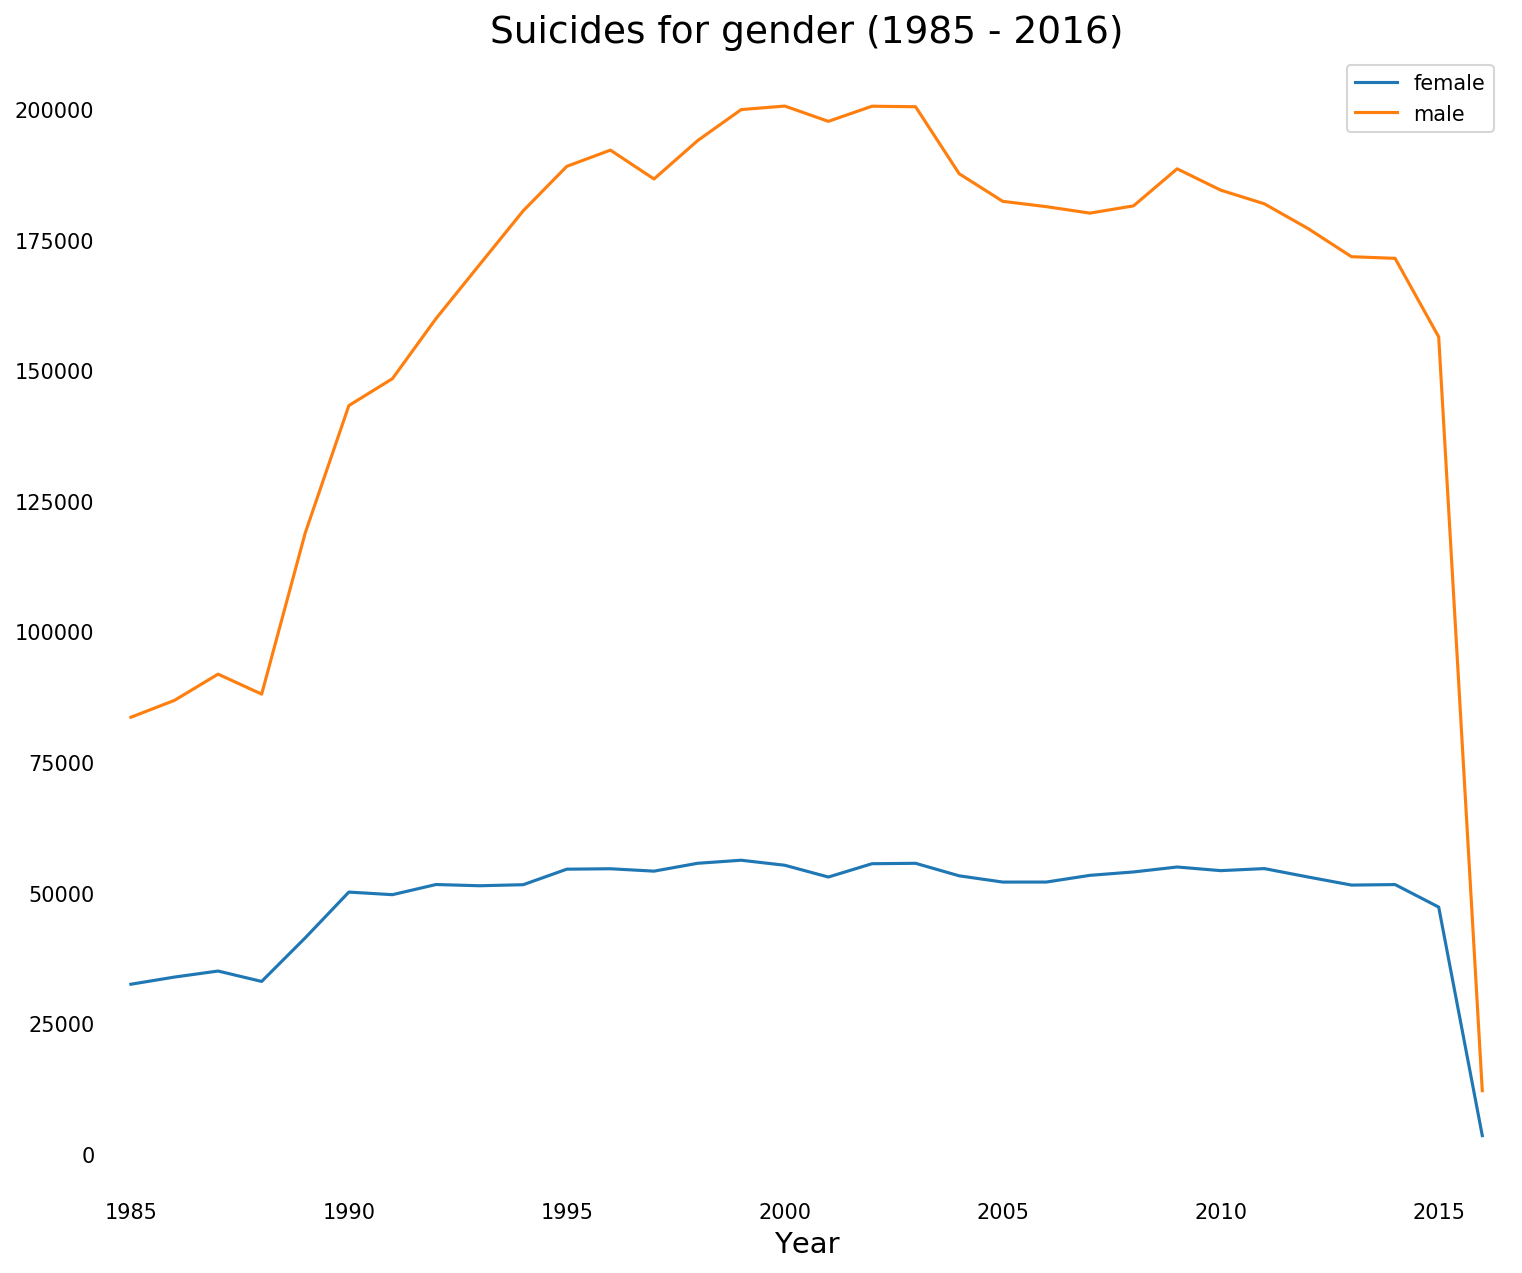

In [10]:
# Plot pivot_data
plt.figure(figsize=(12,10), dpi=150)

#Data
plt.plot(pivot_data.female)
plt.plot(pivot_data.male)

plt.legend()
plt.title('Suicides for gender (1985 - 2016)', fontsize=18)
#plt.ylabel('Amount', fontsize=14)
plt.xlabel('Year', fontsize=14)

spines = plt.gca().spines.values()
# get rid of the frame
for spine in spines:
    spine.set_visible(False)


# remove ticks
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')


# Fit the lines correctly in x axis
plt.xlim((data.year.min() - .5), (data.year.max() + .5))
plt.show()

## Countries histogram

In [11]:
# Gruoup data to focus in important columns
# Usefull columns: No_suicides & suicides/100k_pop

No_sc = data.groupby('country').mean().sort_values(by='suicides/100k_pop',ascending=False)
No_sc.head()

,year,No_suicides,population,suicides/100k_pop,gdp_per_capita
country,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,6518.814815
Hungary,2003.419355,238.358065,8.020782e+05,32.761516,9370.051613
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,3333.904762


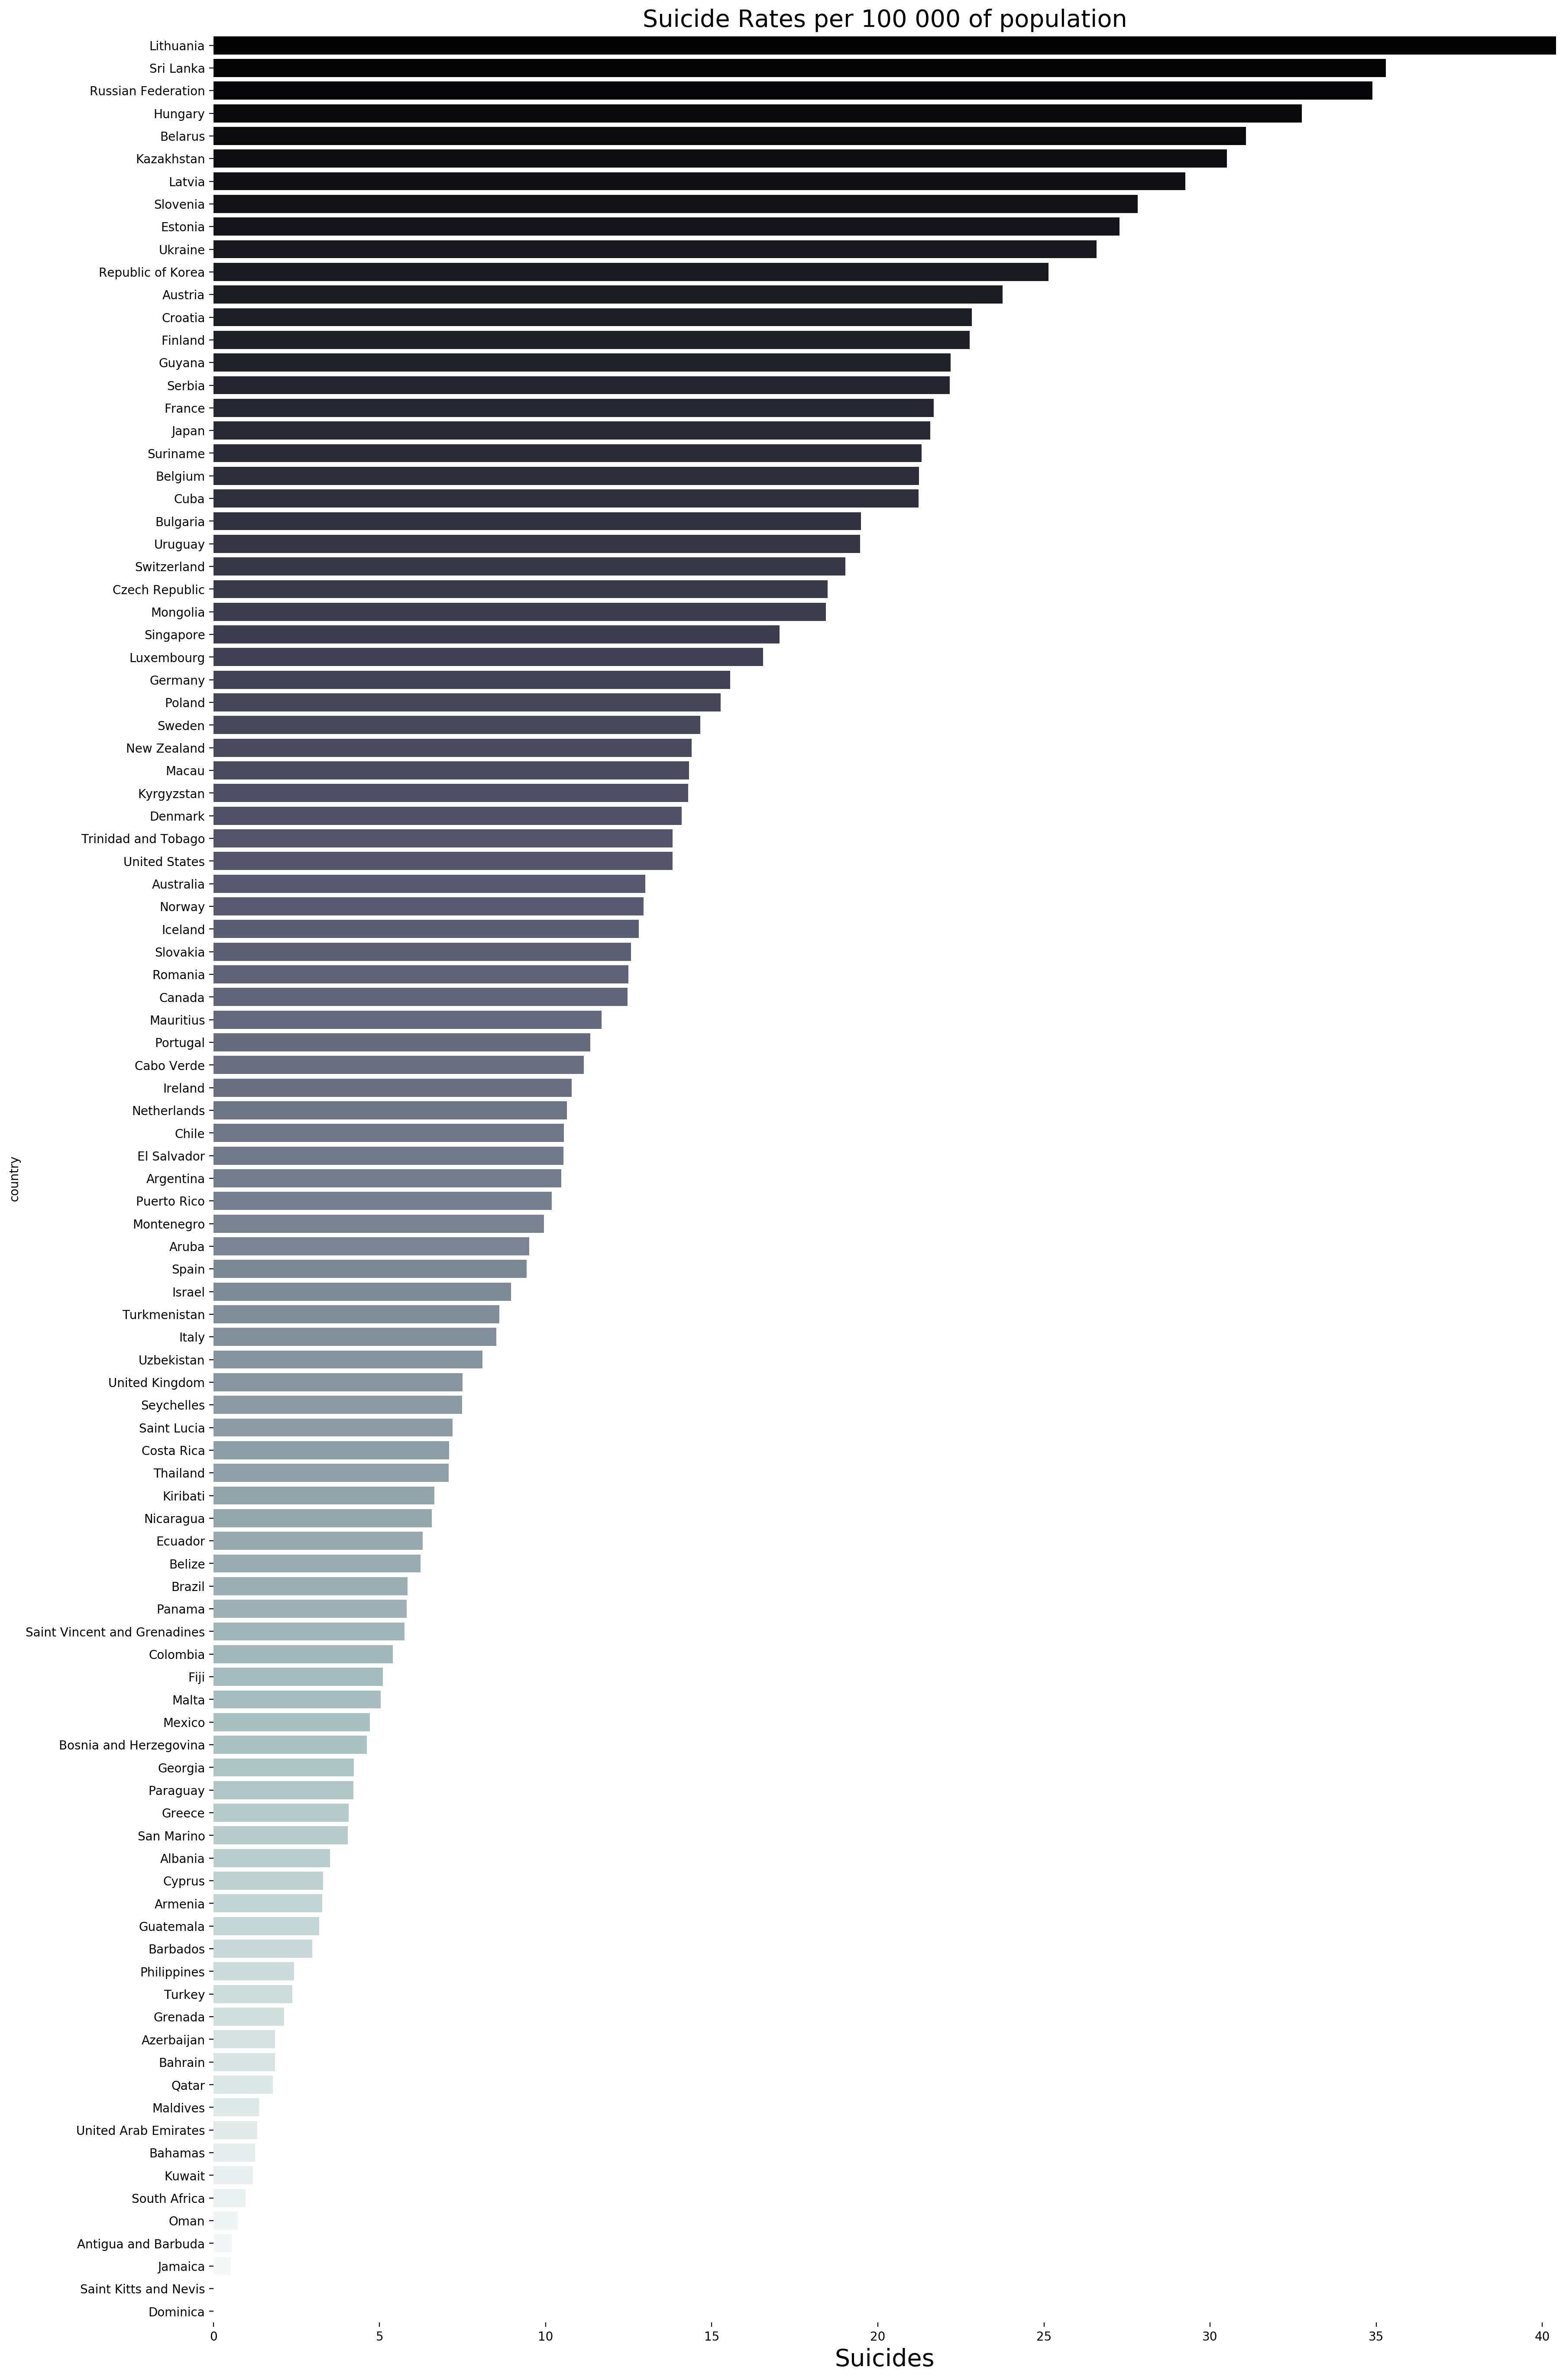

In [12]:
#Determine x and y data
x = No_sc['suicides/100k_pop']
y = No_sc.index

# Ploting
plt.figure(figsize=(20,35), dpi=200)
sns.barplot(x=x, y=y, palette="bone")
plt.title('Suicide Rates per 100 000 of population', fontsize=20)
plt.xlabel('Suicides', fontsize=20)
plt.xlim(0, x.max())

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#plt.savefig('country_hist.png')
plt.show()

## Choropleth Map

https://www.kaggle.com/elcaiseri/data-visualization-and-analysis-for-suicide-rates/notebook

http://geopandas.org/mapping.html

In [13]:
import geopandas

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world = world.drop(columns=['iso_a3', 'gdp_md_est', 'gdp_md_est', 'continent'])
world = world.sort_values(by='name',ascending=True)

In [15]:
world['suicides'] = 0.0
world_index = list(world.index)

# No hubo otra manera, a parte. Estamos en la escuela para fracasar en la escuela y ser exitosos afuera.pls

#row #col           #new data
world['suicides'] = 0.0
world.at[world_index[0],'suicides']= 0.0
world.at[world_index[1],'suicides']= 924.759
world.at[world_index[2],'suicides']= 0.0
world.at[world_index[3],'suicides']= 0.0
world.at[world_index[4],'suicides']= 3894.589
world.at[world_index[5],'suicides']= 976.21
world.at[world_index[6],'suicides']= 4677.41
world.at[world_index[7],'suicides']= 9076.229
world.at[world_index[8],'suicides']= 356.24
world.at[world_index[9],'suicides']= 344.28
world.at[world_index[10],'suicides']= 0.0
world.at[world_index[11],'suicides']= 7831.129
world.at[world_index[12],'suicides']= 7900.5
world.at[world_index[13],'suicides']= 2093.49
world.at[world_index[14],'suicides']= 0.0
world.at[world_index[15],'suicides']= 0.0
world.at[world_index[16],'suicides']= 0.0
world.at[world_index[17],'suicides']= 110.81
world.at[world_index[18],'suicides']= 0.0
world.at[world_index[19],'suicides']= 2174.72
world.at[world_index[20],'suicides']= 0.0
world.at[world_index[21],'suicides']= 7016.08
world.at[world_index[22],'suicides']= 0.0
world.at[world_index[23],'suicides']= 0.0
world.at[world_index[24],'suicides']= 0.0
world.at[world_index[25],'suicides']= 0.0
world.at[world_index[26],'suicides']= 4338.71999999999
world.at[world_index[27],'suicides']= 0.0
world.at[world_index[28],'suicides']= 0.0
world.at[world_index[29],'suicides']= 3921.64
world.at[world_index[30],'suicides']= 0.0
world.at[world_index[31],'suicides']= 2009.39
world.at[world_index[32],'suicides']= 0.0
world.at[world_index[33],'suicides']= 2553.719
world.at[world_index[34],'suicides']= 5982.84
world.at[world_index[35],'suicides']= 6111.95
world.at[world_index[36],'suicides']= 586.25999
world.at[world_index[37],'suicides']= 5952.98999999
world.at[world_index[38],'suicides']= 0.0
world.at[world_index[39],'suicides']= 0.0
world.at[world_index[40],'suicides']= 3721.64999999
world.at[world_index[41],'suicides']= 0.0
world.at[world_index[42],'suicides']= 4854.68
world.at[world_index[43],'suicides']= 2345.2099999
world.at[world_index[44],'suicides']= 0.0
world.at[world_index[44],'suicides']= 0.0
world.at[world_index[45],'suicides']= 3035.94
world.at[world_index[46],'suicides']= 0.0
world.at[world_index[47],'suicides']= 0.0
world.at[world_index[48],'suicides']= 6873.78
world.at[world_index[49],'suicides']= 0.0
world.at[world_index[50],'suicides']= 0.0
world.at[world_index[51],'suicides']= 673.86
world.at[world_index[52],'suicides']= 7924.11
world.at[world_index[53],'suicides']= 0.0
world.at[world_index[54],'suicides']= 7803.25
world.at[world_index[55],'suicides']= 0.0
world.at[world_index[56],'suicides']= 0.0
world.at[world_index[57],'suicides']= 1116.3799999
world.at[world_index[58],'suicides']= 4854.68999
world.at[world_index[59],'suicides']= 0.0
world.at[world_index[60],'suicides']= 1512.1199999
world.at[world_index[61],'suicides']= 660.99999999
world.at[world_index[62],'suicides']= 1146.69999
world.at[world_index[63],'suicides']= 0.0
world.at[world_index[64],'suicides']= 0.0
world.at[world_index[65],'suicides']= 6655.919
world.at[world_index[66],'suicides']= 0.0
world.at[world_index[67],'suicides']= 0.0
world.at[world_index[68],'suicides']= 10156.0699999
world.at[world_index[69],'suicides']= 4889.74
world.at[world_index[70],'suicides']= 0.0
world.at[world_index[71],'suicides']= 0.0
world.at[world_index[72],'suicides']= 0.0
world.at[world_index[73],'suicides']= 0.0
world.at[world_index[74],'suicides']= 3881.72999999
world.at[world_index[75],'suicides']= 3329.9699
world.at[world_index[76],'suicides']= 3168.87
world.at[world_index[77],'suicides']= 106.44
world.at[world_index[78],'suicides']= 8025.22999
world.at[world_index[79],'suicides']= 0.0
world.at[world_index[80],'suicides']= 9519.5199999
world.at[world_index[81],'suicides']= 0.0
world.at[world_index[82],'suicides']= 0.0
world.at[world_index[83],'suicides']= 355.93
world.at[world_index[84],'suicides']= 4457.3
world.at[world_index[85],'suicides']= 0.0
world.at[world_index[86],'suicides']= 7373.35
world.at[world_index[87],'suicides']= 0.0
world.at[world_index[88],'suicides']= 0.0
world.at[world_index[89],'suicides']= 0.0
world.at[world_index[90],'suicides']= 0.0
world.at[world_index[91],'suicides']= 10588.8799
world.at[world_index[92],'suicides']= 6156.5599999
world.at[world_index[93],'suicides']= 0.0
world.at[world_index[94],'suicides']= 0.0
world.at[world_index[95],'suicides']= 0.0
world.at[world_index[96],'suicides']= 0.0
world.at[world_index[97],'suicides']= 0.0
world.at[world_index[98],'suicides']= 4464.57999999
world.at[world_index[99],'suicides']= 1751.18999999
world.at[world_index[100],'suicides']=0.0
world.at[world_index[101],'suicides']= 184.39
world.at[world_index[102],'suicides']=1194.02999
world.at[world_index[103],'suicides']=0.0
world.at[world_index[104],'suicides']=0.0
world.at[world_index[105],'suicides']=0.0
world.at[world_index[106],'suicides']=586.25999999
world.at[world_index[107],'suicides']=0.0
world.at[world_index[108],'suicides']=0.0
world.at[world_index[109],'suicides']= 4066.51999
world.at[world_index[110],'suicides']= 0.0
world.at[world_index[110],'suicides']= 0.0
world.at[world_index[111],'suicides']= 5008.32
world.at[world_index[112],'suicides']= 472.82
world.at[world_index[113],'suicides']= 0.0
world.at[world_index[114],'suicides']= 0.0
world.at[world_index[115],'suicides']= 0.0
world.at[world_index[116],'suicides']= 4658.76
world.at[world_index[117],'suicides']= 26.5
world.at[world_index[118],'suicides']= 0.0
world.at[world_index[119],'suicides']= 0.0
world.at[world_index[120],'suicides']= 1744.059999
world.at[world_index[121],'suicides']= 0.0
world.at[world_index[122],'suicides']= 1366.37
world.at[world_index[123],'suicides']= 0.0
world.at[world_index[124],'suicides']= 435.83
world.at[world_index[125],'suicides']= 4397.62
world.at[world_index[126],'suicides']= 3673.36
world.at[world_index[127],'suicides']= 3789.27
world.at[world_index[128],'suicides']= 318.1499999
world.at[world_index[129],'suicides']= 4171.55
world.at[world_index[130],'suicides']= 11305.13
world.at[world_index[131],'suicides']= 0.0
world.at[world_index[132],'suicides']= 0.0
world.at[world_index[133],'suicides']= 0.0
world.at[world_index[134],'suicides']= 0.0
world.at[world_index[135],'suicides']= 4787.45
world.at[world_index[136],'suicides']= 0.0
world.at[world_index[137],'suicides']= 3318.15999
world.at[world_index[138],'suicides']= 7012.61999
world.at[world_index[139],'suicides']= 0.0
world.at[world_index[140],'suicides']= 0.0
world.at[world_index[141],'suicides']= 0.0
world.at[world_index[142],'suicides']= 231.48999
world.at[world_index[143],'suicides']= 9350.4499999
world.at[world_index[144],'suicides']= 0.0
world.at[world_index[144],'suicides']= 3509.06
world.at[world_index[145],'suicides']= 4658.9599
world.at[world_index[146],'suicides']= 0.0
world.at[world_index[147],'suicides']= 0.0
world.at[world_index[148],'suicides']= 5247.719999
world.at[world_index[149],'suicides']= 4794.07
world.at[world_index[150],'suicides']= 0.0
world.at[world_index[151],'suicides']= 0.0
world.at[world_index[152],'suicides']= 0.0
world.at[world_index[153],'suicides']= 0.0
world.at[world_index[154],'suicides']= 2362.67
world.at[world_index[155],'suicides']= 0.0
world.at[world_index[156],'suicides']= 0.0
world.at[world_index[157],'suicides']= 4479.509999999
world.at[world_index[158],'suicides']= 0.0
world.at[world_index[159],'suicides']= 199.17
world.at[world_index[160],'suicides']= 2994.73
world.at[world_index[161],'suicides']= 0.0
world.at[world_index[162],'suicides']= 8931.65999
world.at[world_index[163],'suicides']= 94.8899999
world.at[world_index[164],'suicides']= 2790.9199
world.at[world_index[165],'suicides']= 5140.97
world.at[world_index[166],'suicides']= 6538.96
world.at[world_index[167],'suicides']= 2138.17
world.at[world_index[168],'suicides']= 0.0
world.at[world_index[169],'suicides']= 0.0
world.at[world_index[170],'suicides']= 0.0
world.at[world_index[171],'suicides']= 0.0
world.at[world_index[172],'suicides']= 0.0
world.at[world_index[173],'suicides']= 0.0
world.at[world_index[174],'suicides']= 0.0
world.at[world_index[175],'suicides']= 0.0

#world = world.set_index('name').join(x/100,how='inner')

In [16]:
world['suicides'] = world['suicides']/300
world.head()

,pop_est,name,geometry,suicides
103,34124811,Afghanistan,"POLYGON ((66.51860680528867 37.36278432875879,...",0.000000
125,3047987,Albania,"POLYGON ((21.0200403174764 40.84272695572588, ...",3.082530
82,40969443,Algeria,POLYGON ((-8.684399786809053 27.39574412689601...,0.000000
74,29310273,Angola,(POLYGON ((12.99551720546518 -4.78110320396188...,0.000000
9,44293293,Argentina,(POLYGON ((-68.63401022758323 -52.636370458874...,12.981963


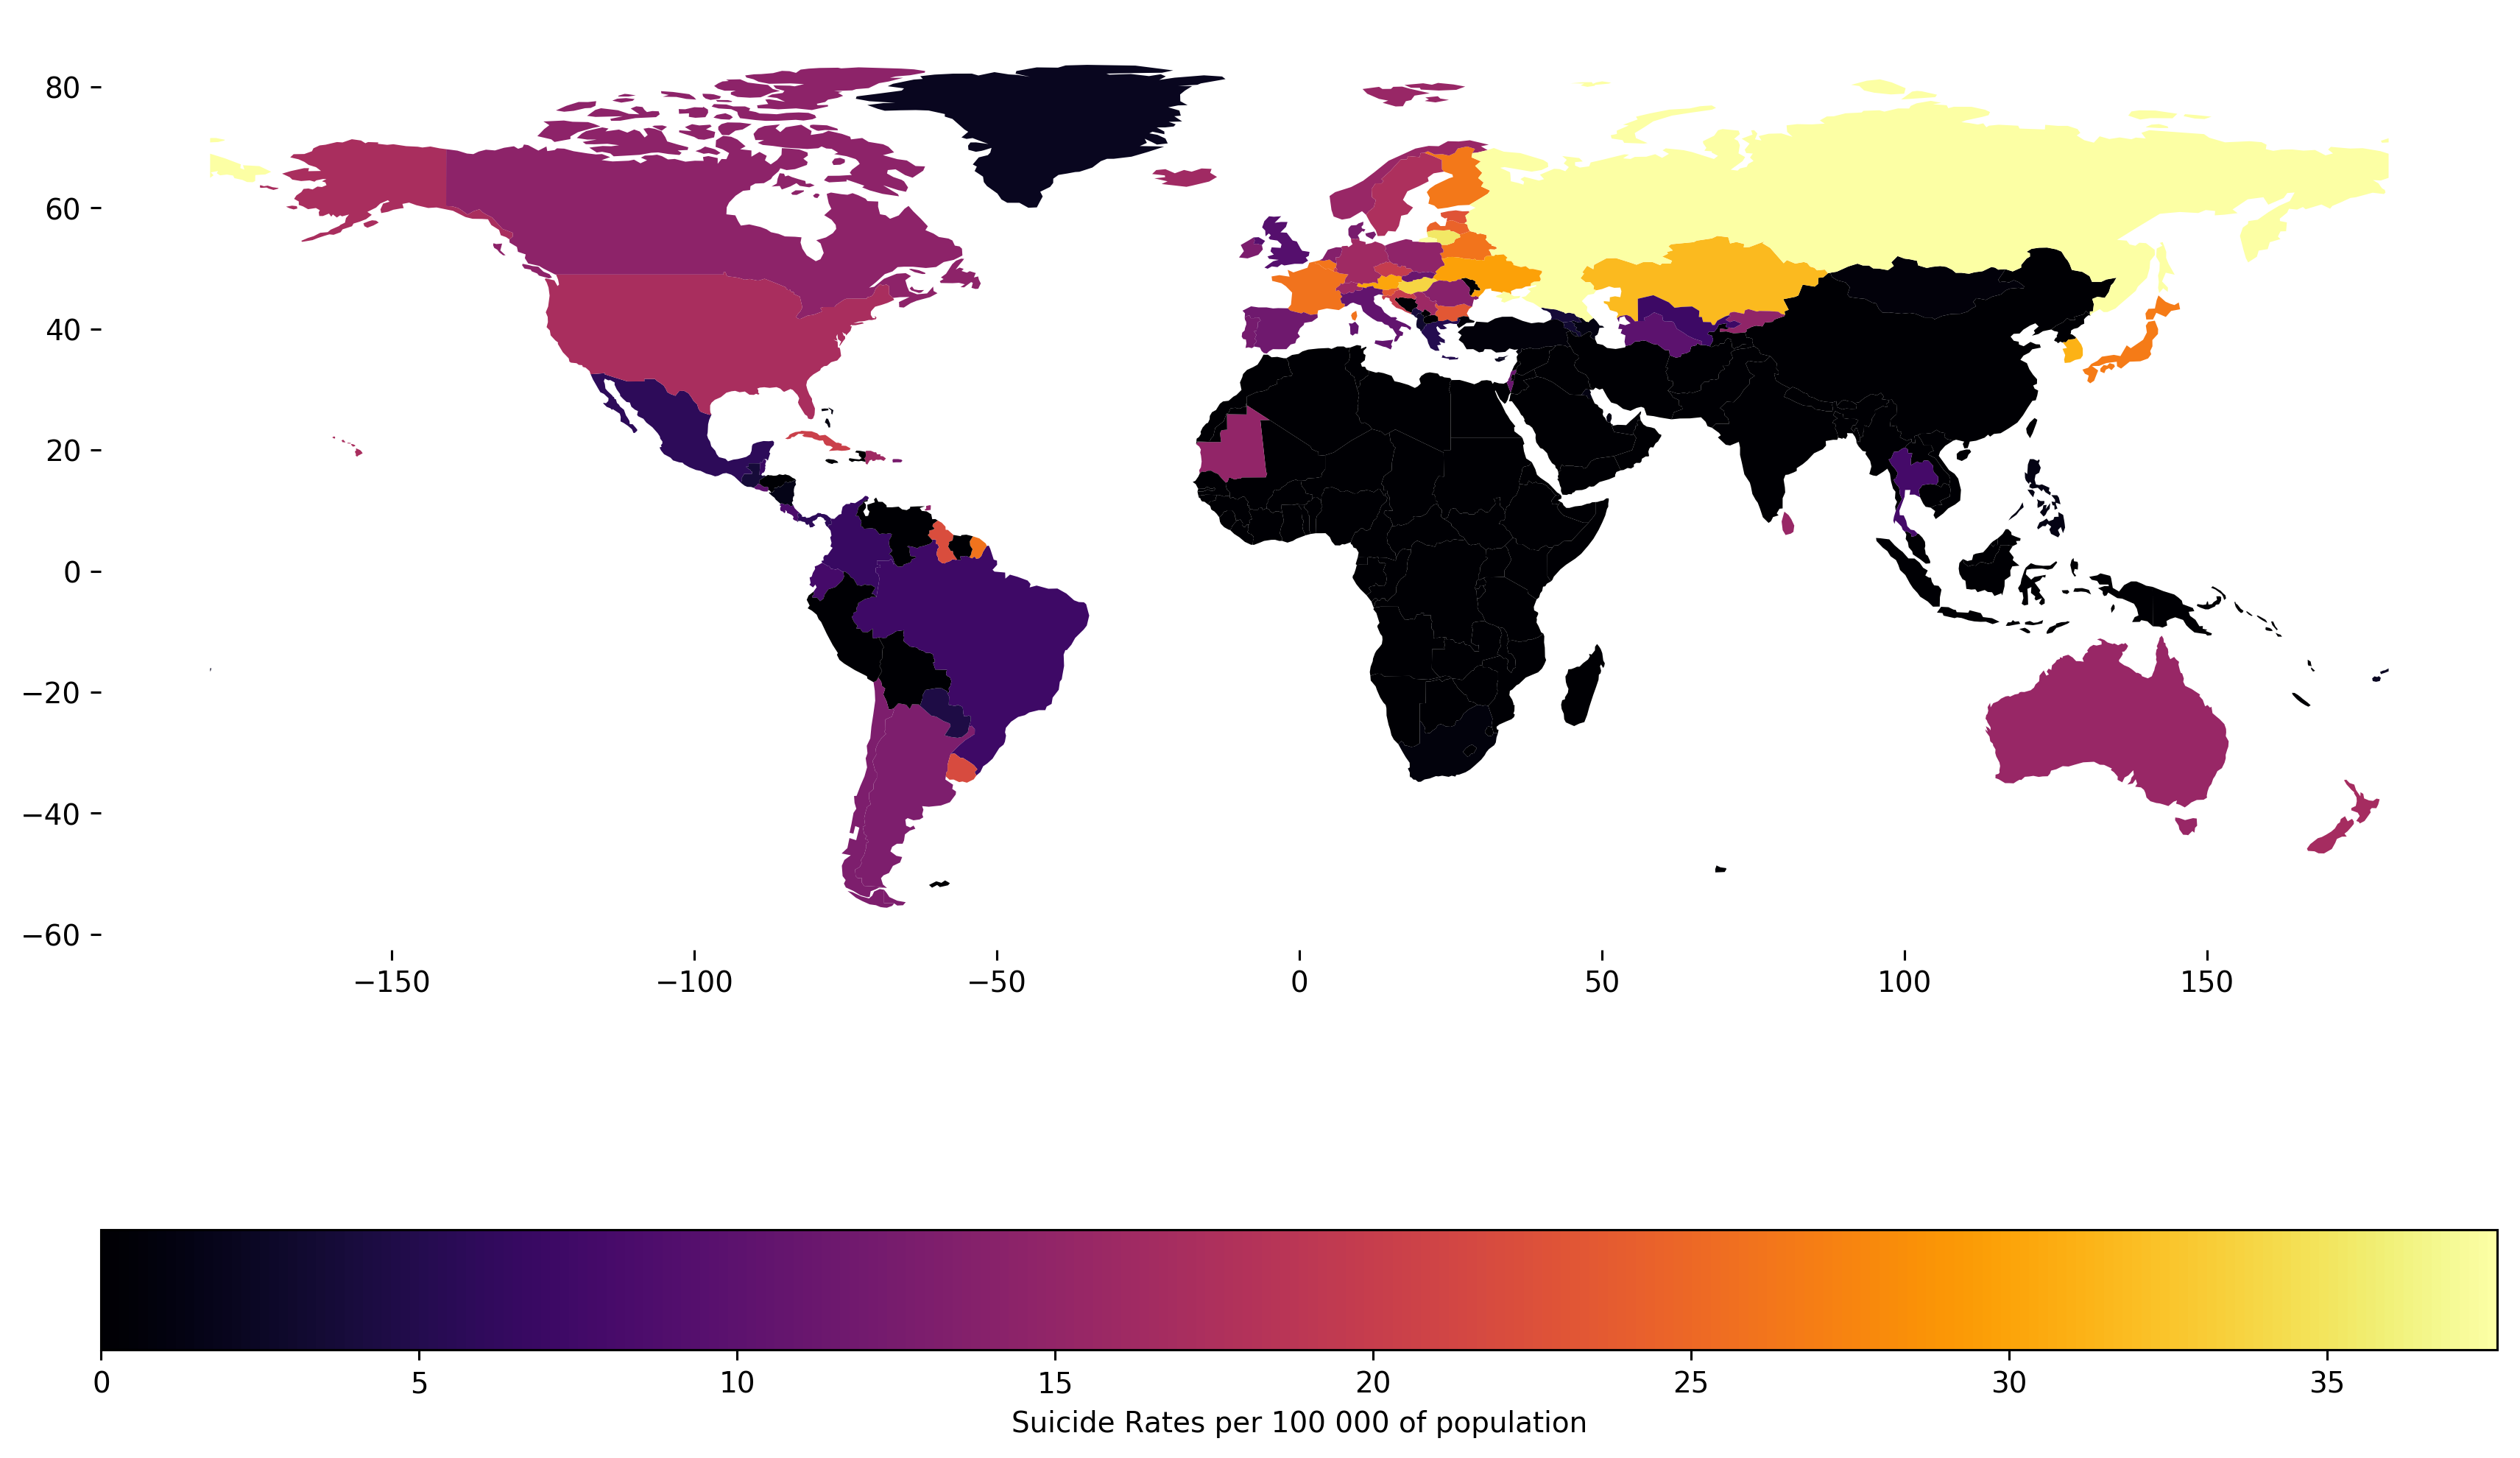

In [65]:
fig, ax = plt.subplots(1, 1, sharey=True, dpi=280, figsize=(15,12))
world.plot(column='suicides', ax=ax, legend=True, cmap='inferno', legend_kwds={'label': "Suicide Rates per 100 000 of population", 'orientation': "horizontal"})

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('Choropleth_Map.png')
plt.show()

# Numbers in both bottom and left side cannot be dropped, it is a disavantage of GeoPandas

## Suicides per ages classification

In [18]:
data.head(5)

,country,year,sex,age,No_suicides,population,suicides/100k_pop,country_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [19]:
# Delete the word 'year' from all the rows in the column age
data['age'] = data['age'].replace('years', ' ', regex=True)
data['age'] = data['age'].astype(str)
data['age'].head()

0    15-24  
1    35-54  
2    15-24  
3      75+  
4    25-34  
Name: age, dtype: object

In [20]:
# focus the data using pivot and sort to display clearly
age_sui = data.pivot_table('No_suicides', index='age', aggfunc='sum')
age_sui = age_sui.sort_values(by='age',ascending=True)
age_sui

,No_suicides
age,
15-24,808542
25-34,1123912
35-54,2452141
5-14,52264
55-74,1658443
75+,653118


In [21]:
# Convert numbers in percentage
age_sui['No_suicides'] = age_sui['No_suicides'] *100 / age_sui['No_suicides'].sum()
age_sui

,No_suicides
age,
15-24,11.981204
25-34,16.654447
35-54,36.336520
5-14,0.774463
55-74,24.575278
75+,9.678088


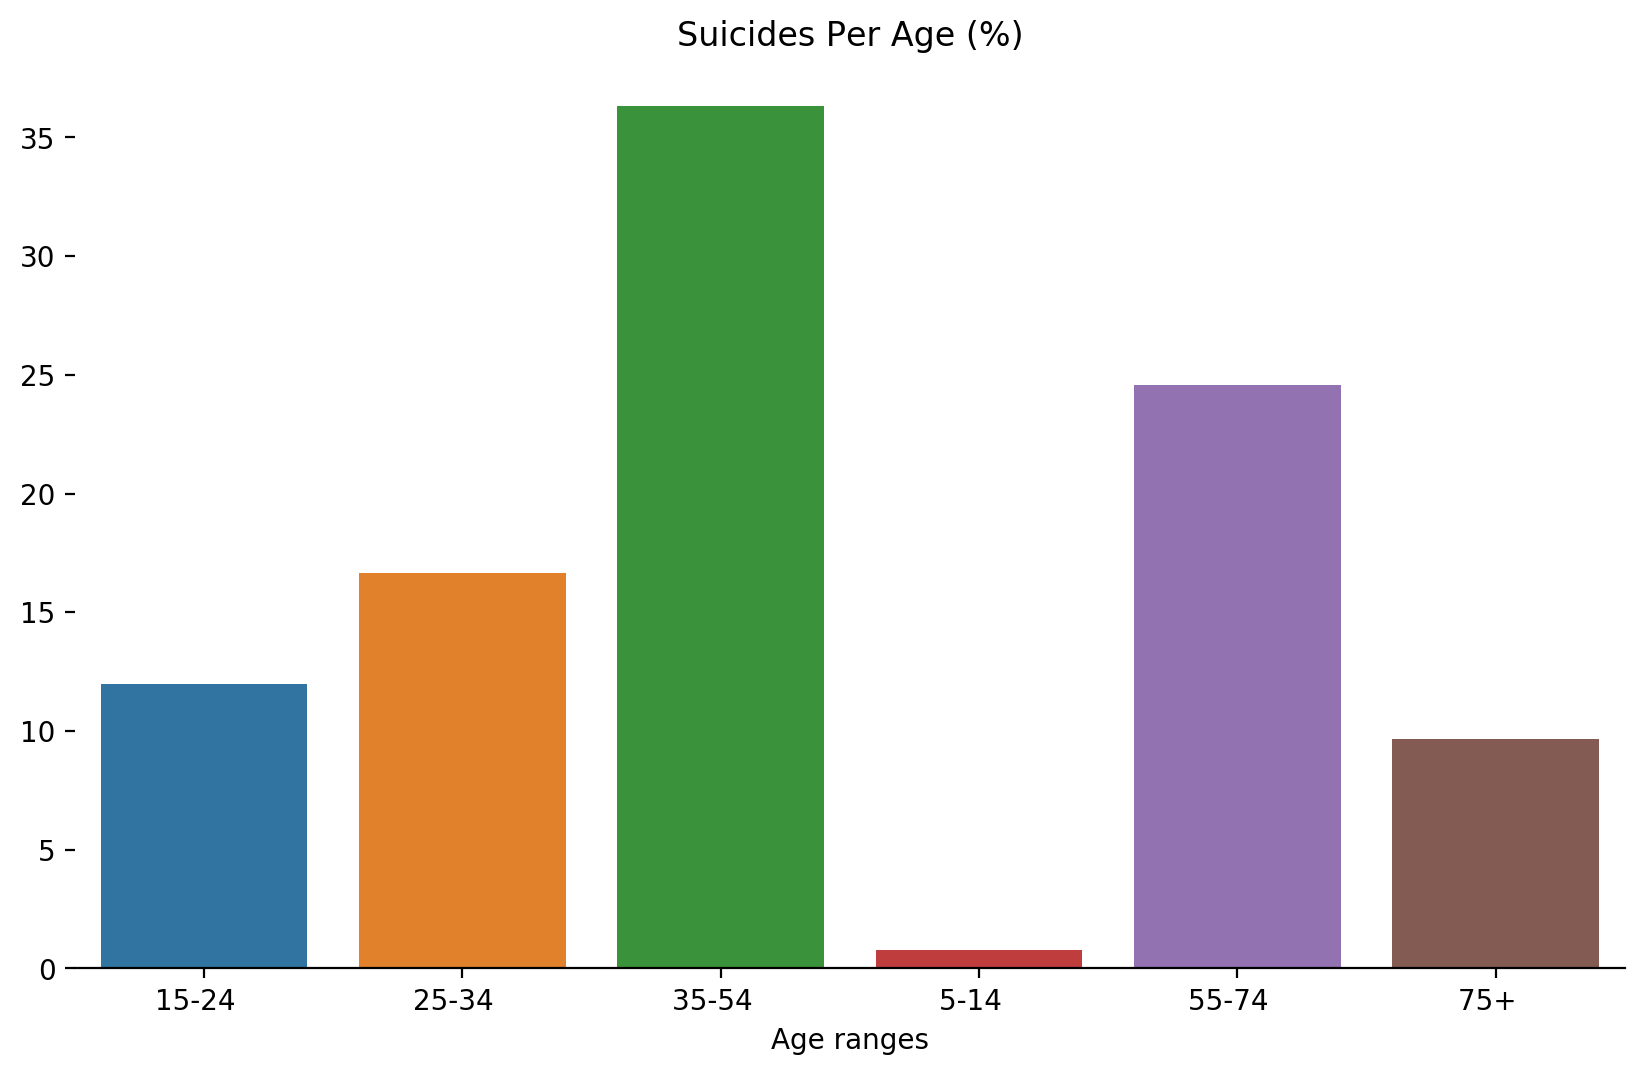

In [22]:
# Set Variables.
x = age_sui.index.values
y = age_sui.values
y = y.reshape(6,)

# Ploting
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
sns.barplot(x=x, y=y)
ax.set(title='Suicides Per Age (%)', xlabel='Age ranges');
plt.xticks();

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Only show ticks on the left and bottom spines
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('bottom')

plt.show()
#5, 10, 15, 20